Calling Necessary Libraries

In [1]:
import tensorflow as tf
import pandas as pd  
import matplotlib.pyplot as plt    
import seaborn as sns  
from sklearn.model_selection import train_test_split

Display Basic Information

In [2]:
data=pd.read_csv('estonia-passenger-list.csv')

In [3]:
data.head()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  989 non-null    int64 
 1   Country      989 non-null    object
 2   Firstname    989 non-null    object
 3   Lastname     989 non-null    object
 4   Sex          989 non-null    object
 5   Age          989 non-null    int64 
 6   Category     989 non-null    object
 7   Survived     989 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 61.9+ KB


In [ ]:
print("Duplicated rows: ",data.duplicated().sum())

In [ ]:
data.isnull().value_counts()
print(f"Missing Values per Column:\n{data.isnull().sum()}")

In [5]:
data.describe()

,PassengerId,Age,Survived
count,989.000000,989.000000,989.000000
mean,494.992922,44.575329,0.138524
std,285.643660,17.235146,0.345624
min,1.000000,0.000000,0.000000
25%,248.000000,30.000000,0.000000
50%,495.000000,44.000000,0.000000
75%,742.000000,59.000000,0.000000
max,989.000000,87.000000,1.000000


Visualizations

In [6]:
data['Age'].unique()

array([62, 22, 21, 53, 55, 71, 60, 18, 30, 63, 67, 61, 40, 68, 36, 23, 31,
       74, 56, 32, 28, 72, 75, 33, 42, 41, 50, 65, 39, 69, 70, 38, 52, 43,
       49, 27, 73, 45, 64, 20, 46, 29, 35, 26, 51, 66, 44, 80,  5, 54, 57,
       37, 17, 48, 25, 59, 81, 24, 14, 12, 47, 58, 34, 76, 19, 78, 16, 82,
       13,  4, 10, 77,  6,  9, 15,  0,  2, 87], dtype=int64)

<Axes: >

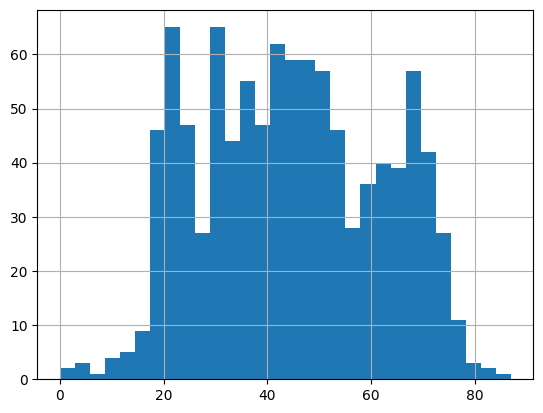

In [7]:
data['Age'].hist(bins=30)

In [8]:
#Reducing data size 
data['full_name'] = data[['Firstname', 'Lastname']].fillna('').agg(' '.join, axis=1)
data.drop(columns=['Firstname','Lastname'])
data.head()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived,full_name
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0,ARVID KALLE AADLI
1,2,Estonia,LEA,AALISTE,F,22,C,0,LEA AALISTE
2,3,Estonia,AIRI,AAVASTE,F,21,C,0,AIRI AAVASTE
3,4,Sweden,JURI,AAVIK,M,53,C,0,JURI AAVIK
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0,BRITTA ELISABET AHLSTROM


In [9]:
data['full_name'].sort_values(ascending=True)

380                  AARE KIMMEL
403                 AARNE KOPPEL
667     AASA MARGARETA PETERSSON
400                  AAVO KOOGAS
229                  ADAM HALTER
                 ...            
130             WOLTER JOHAN EHN
958      YASMINA SOFIA WEIDINGER
376                   YLOQ KIKAS
479                   YNGVE LIEN
616    YVONNE BRITT MARIE NORLIN
Name: full_name, Length: 989, dtype: object

<Axes: ylabel='Sex'>

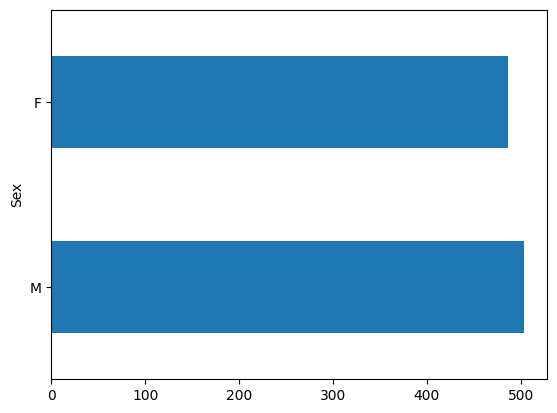

In [10]:
data['Sex'].value_counts().plot(kind='barh')

<Axes: ylabel='count'>

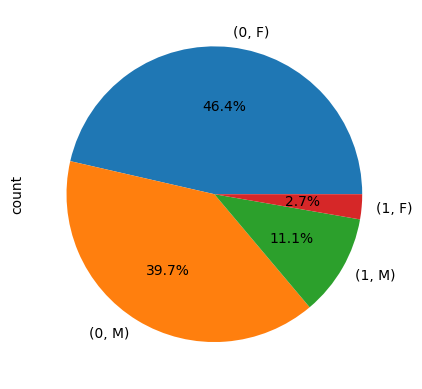

In [11]:
data.groupby('Survived')['Sex'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [12]:
data['Country'].unique()

array(['Sweden', 'Estonia', 'Latvia', 'Russia', 'Germany', 'Finland',
       'Great Britain', 'Morocco', 'Denmark', 'France', 'Netherlands',
       'Norway', 'Lithuania', 'Nigeria', 'Canada', 'Belarus'],
      dtype=object)

<Axes: xlabel='Country'>

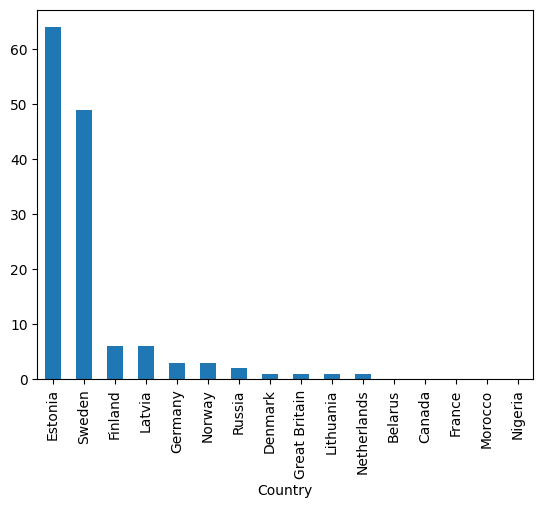

In [13]:
data.groupby('Country')['Survived'].sum().sort_values(ascending=False).plot(kind='bar')

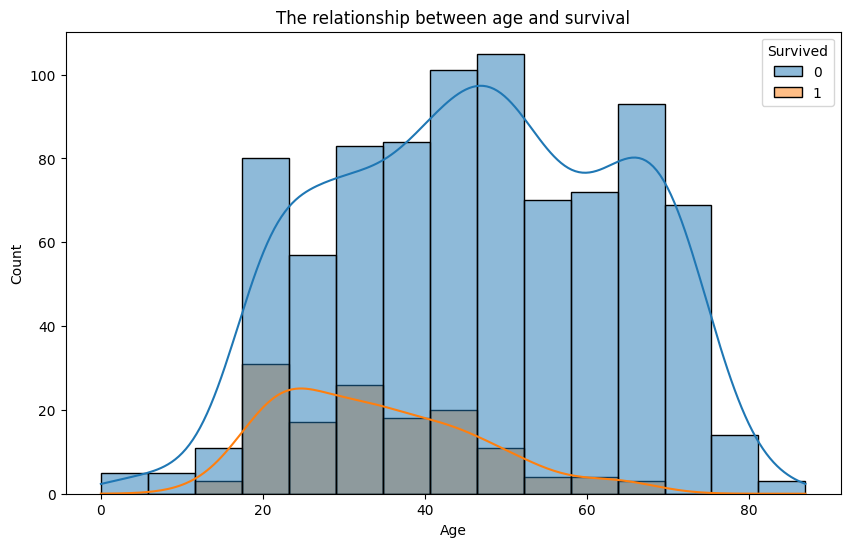

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(data=data,x='Age',hue='Survived',kde=True)
plt.title('The relationship between age and survival')
plt.show()

<Axes: ylabel='Category'>

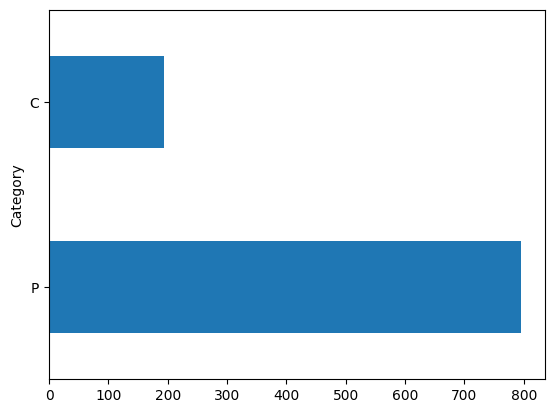

In [15]:
data['Category'].value_counts().plot(kind='barh')

<Axes: ylabel='Density'>

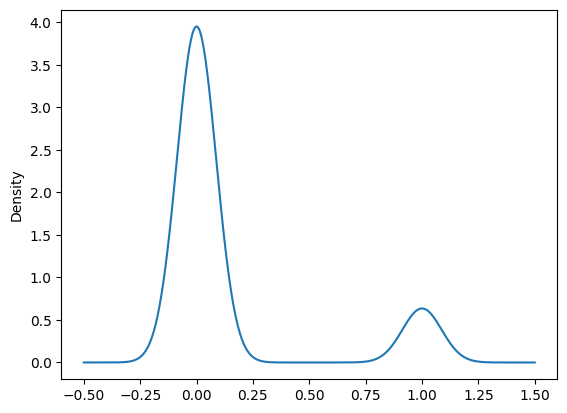

In [16]:
data['Survived'].plot(kind='density')

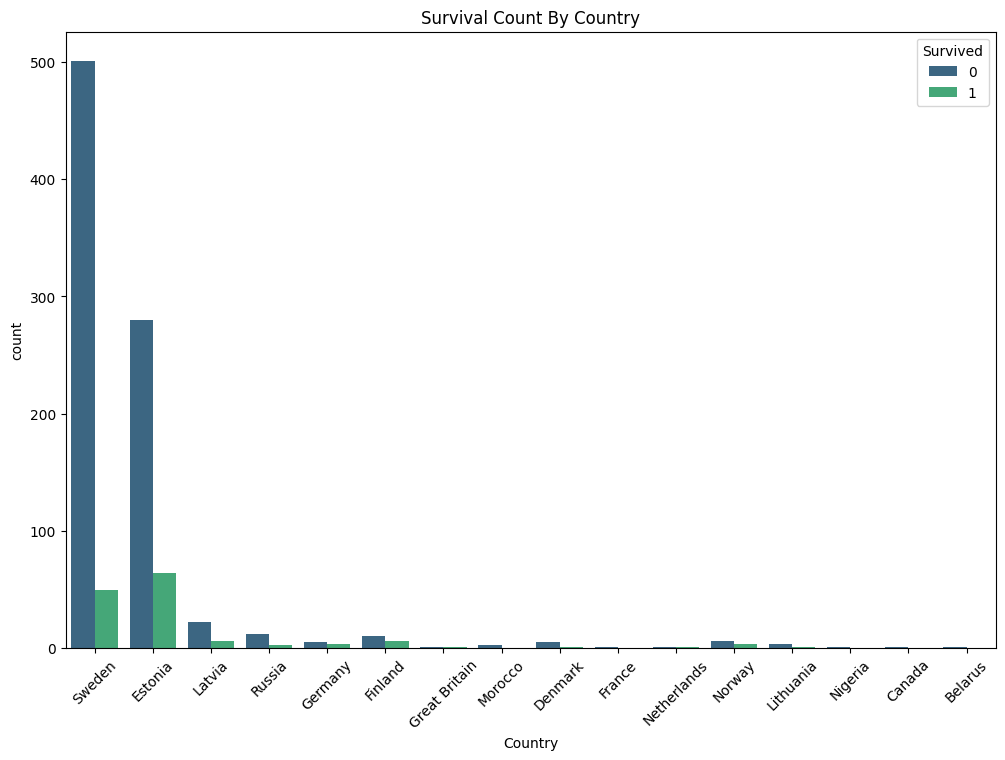

In [17]:
plt.figure(figsize=(12,8))
sns.countplot(data=data,x='Country',hue='Survived',palette='viridis')
plt.title('Survival Count By Country')
plt.xticks(rotation=45)
plt.show()

In [ ]:
latvia_survivors_age=data[(data['Country']=='Latvia')&(data['Survived']==1)]['Age']
latvia_survivors_age.plot(kind='line',marker='o',linestyle='--',color='r').set_title('Latvia survivors age')
plt.xlabel('Index')
plt.ylabel('Age')
plt.show()

Define Labels

In [25]:
x=data.drop(columns=['Survived','PassengerId'])
y=data['Survived']

Spliting Data 

In [24]:
dftrain,dfeval,y_train,y_eval=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

Feature Columns 

In [ ]:
feature_columns=[
    tf.feature_column.numeric_column('Age',dtype=tf.float32),
    tf.feature_column.embedding_column(
        tf.feature_column.categorical_column_with_vocabulary_list(
            "Country",x["Country"].unique()
        ),dimension=3
    ),
    tf.feature_column.embedding_column(
        tf.feature_column.categorical_column_with_vocabulary_list(
            "Sex",x["Sex"].unique()
        ),dimension=3
    ),
    tf.feature_column.embedding_column(
        tf.feature_column.categorical_column_with_vocabulary_list(
            "Category",x['Category'].unique()
        ),dimension=3
    ),

]

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


The input Function (straight from the TensorFlow documentation)

In [34]:
def make_input_fn(data_df,label_df,num_epochs=10,shuffle=True,batch_size=32):
    def input_function():
        ds=tf.data.Dataset.from_tensor_slices((dict(data_df),label_df))
        if shuffle:
            ds=ds.shuffle(1000)
        ds=ds.batch(batch_size).repeat(num_epochs)
        return ds 
    return input_function

train_input_fn=make_input_fn(dftrain,y_train)
eval_input_fn=make_input_fn(dfeval,y_eval,num_epochs=1,shuffle=False)


Creating and Training The Model

In [43]:
dnn_estimator=tf.estimator.DNNClassifier(
    feature_columns=feature_columns,
    hidden_units=[32,16],
    activation_fn=tf.nn.relu
)
dnn_estimator.train(train_input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\DELL\\AppData\\Local\\Temp\\tmp87eh1ddd', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorfl

Evaluation

In [44]:
result=dnn_estimator.evaluate(eval_input_fn)
print('Evaluation Result :')
for k , v in result.items():
    print(f"{k}: {v:.3f}")

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2025-02-15T02:03:47
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DELL\AppData\Local\Temp\tmp87eh1ddd\model.ckpt-250
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.69220s
INFO:tensorflow:Finished evaluation at 2025-02-15-02:03:48
INFO:tensorflow:Saving dict for global step 250: accuracy = 0.8636364, accuracy_baseline = 0.8636364, auc = 0.72742045, auc_precision_recall = 0.23429078, average_loss = 0.36274588, global_step = 250, label/mean = 0.13636364, loss = 0.35129875, precision = 0.0, prediction/mean = 0.12946431, recall = 0.0
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 250: C:\Users\DELL\AppData\Local\Temp\tmp87eh1ddd\model.ckpt-250
Evaluation Result :
accuracy: 0.864
accuracy_baseline: 0.864
auc: 0.727
auc_precision_recall: 0.234
average_lo

Making Predictions 

In [48]:
predict_input=tf.compat.v1.estimator.inputs.pandas_input_fn(
    x=dfeval.head(10),
    num_epochs=1,
    shuffle=False
)

predictions=list(dnn_estimator.predict(input_fn=predict_input))
sample_predictions=[p['class_ids'][0] for p in predictions]
sample_labels=y_eval.head(10)

print("Actual Labels:", list(sample_labels.values))
print("Predicted Labels:", sample_predictions)


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\DELL\AppData\Local\Temp\tmp87eh1ddd\model.ckpt-250
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Actual Labels: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
Predicted Labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
